## Cargar librerias

In [1]:
!pip install neurolab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.3/645.3 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for neurolab: filename=neurolab-0.3.5-py3-none-any.whl size=22181 sha256=7fe04dabf2d7b16ae57e752be4c78fe0139b18d5fb682519947b51b173b4b0d9
  Stored in directory: /root/.cache/pip/wheels/1d/c0/44/7142fa43c89473c5e63a750a00224e5f9ec9ca80613de1f97d
Successfully built neurolab


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl


## Cargar los datos



In [3]:
data = np.loadtxt('data_simple_nn.txt')
print(data)

[[1.  4.  0.  0. ]
 [1.1 3.9 0.  0. ]
 [1.2 4.1 0.  0. ]
 [0.9 3.7 0.  0. ]
 [7.  4.  0.  1. ]
 [7.2 4.1 0.  1. ]
 [6.9 3.9 0.  1. ]
 [7.1 4.2 0.  1. ]
 [4.  1.  1.  0. ]
 [4.1 0.9 1.  0. ]
 [4.2 1.1 1.  0. ]
 [3.9 0.8 1.  0. ]
 [4.  7.  1.  1. ]
 [4.2 7.2 1.  1. ]
 [3.9 7.1 1.  1. ]
 [4.1 6.8 1.  1. ]]


In [4]:
data.shape

(16, 4)

Separamos entradas y salidas

In [5]:
#Entrada
X = data[:,0:2]
print(X)

[[1.  4. ]
 [1.1 3.9]
 [1.2 4.1]
 [0.9 3.7]
 [7.  4. ]
 [7.2 4.1]
 [6.9 3.9]
 [7.1 4.2]
 [4.  1. ]
 [4.1 0.9]
 [4.2 1.1]
 [3.9 0.8]
 [4.  7. ]
 [4.2 7.2]
 [3.9 7.1]
 [4.1 6.8]]


In [6]:
#Salida
y = data[:,2:]
print(y)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


Text(0.5, 1.0, 'Datos de Entrada')

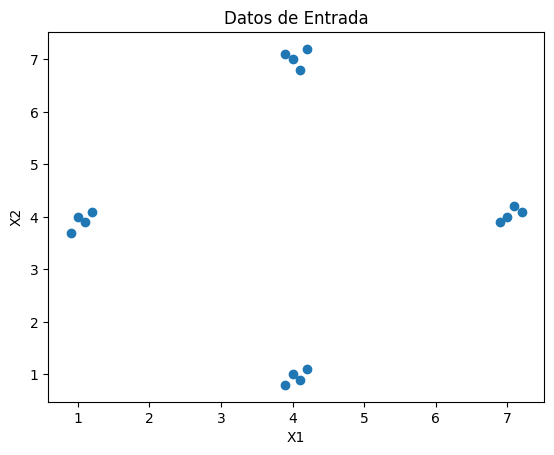

In [9]:
#Gráficos de data
plt.figure()
plt.scatter(data[:,0],data[:,1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Datos de Entrada')

Text(0.5, 1.0, 'Datos de Entrada')

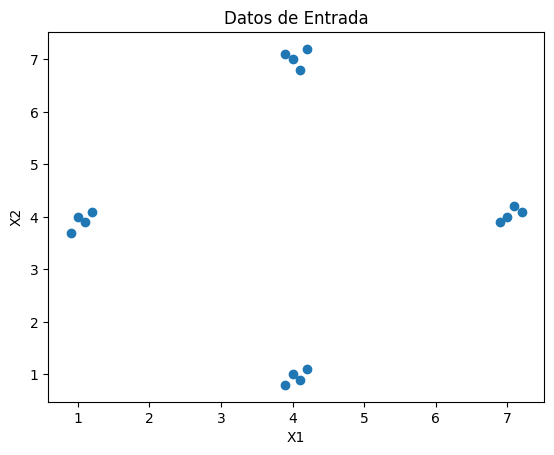

In [10]:
#Gráficos de data
plt.figure()
plt.scatter(data[:,0],data[:,1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Datos de Entrada')

###Definir el mínimo y máximo para cada entrada

In [11]:
x1_min, x1_max = data[:,0].min(), data[:,0].max()

In [12]:
x2_min, x2_max = data[:,1].min(), data[:,1].max()

In [13]:
print(x1_min,x1_max,x2_min,x2_max)

0.9 7.2 0.8 7.2


## Numero de neuronas en la capa de salida

In [14]:
num_salidas = y.shape[1]
print(num_salidas)

2


## Definir un perceptron con 2 neuronas de entrada y 2 de salida

In [15]:
x1 = [x1_min,x1_max]
x2 = [x2_min,x2_max]
#perceptron = nl.net.newp([x1,x2],num_salidas)

In [28]:
net = nl.net.newff([x1, x2], [3,5,4,2])

##Entrenar el perceptron usando la data

In [29]:
progreso_error = net.train(X,y,epochs=1000,show=20)

Epoch: 20; Error: 2.664339821912603;
Epoch: 40; Error: 2.094082362302355;
Epoch: 60; Error: 1.2435933933352121;
Epoch: 80; Error: 0.03874453551830794;
The goal of learning is reached


###Gráfico del progreso de entrenamiento

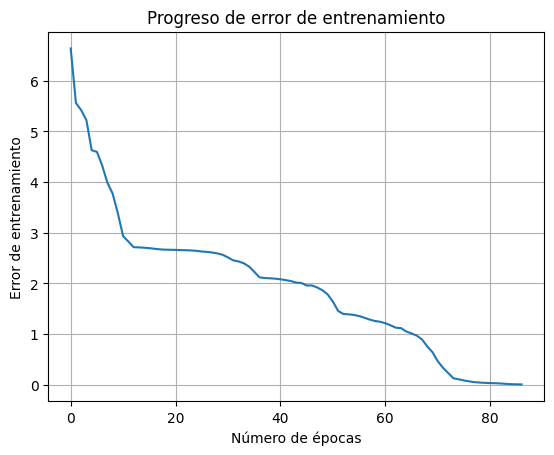

In [30]:
plt.figure()
plt.plot(progreso_error)
plt.xlabel('Número de épocas')
plt.ylabel('Error de entrenamiento')
plt.title('Progreso de error de entrenamiento')
plt.grid()

In [31]:
print('\nResultados de Prueba:')
datos_prueba = [[1,4],[4,7]]
for item in datos_prueba:
  print(item, '--->',net.sim([item]))


Resultados de Prueba:
[1, 4] ---> [[-0.00041187 -0.01297433]]
[4, 7] ---> [[0.95826233 0.99999987]]


## Guardar y cargar una red neuronal entrenada

In [23]:
# Save network in file
net.save('net.net')
# Load network
# net = nl.load('test.net')